In [3]:
!pip install Pillow
!pip install opencv-python

from PIL import Image
import cv2
import glob
from scipy.interpolate import interp2d
#warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
from scipy.interpolate import CubicSpline
from ripser import ripser 
from persim import plot_diagrams

from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import os
from pathlib import Path

from scipy.interpolate import CubicSpline
from ripser import ripser 
from persim import plot_diagrams


In [4]:
import cv2
import os
import numpy as np
def video_to_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read the video frame by frame
    frame_count = 0
    while video.isOpened():
        ret, frame = video.read()

        if not ret:
            break

        # Save the frame as an image
        output_path = os.path.join(output_folder, f'frame{frame_count}.jpg')
        cv2.imwrite(output_path, frame)

        frame_count += 1

    # Release the video file
    video.release()

#Provide the path to your video file
#video_path = 'Downloads/MSRI-UP Project 3/dots_quasi.wmv'
#output_folder='Downloads/MSRI-UP Project 3/frames'

#Convert the video to frames and save as individual images
#video_to_frames(video_path, output_folder)


In [5]:
#Load Frame 

def loadFrame(framefilepath):

    image_path=framefilepath
    image=cv2.imread(image_path)
    
    #Split the image into RGB channels 
    blue_channel, green_channel, red_channel=cv2.split(image)

    #fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    #axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #axes[0, 0].set_title("Original Image")
    #axes[0, 0].axis("off")
    #axes[0, 1].imshow(blue_channel, cmap='gray')
    #axes[0, 1].set_title("Blue Channel")
    #axes[0, 1].axis("off")
    #axes[1, 0].imshow(green_channel, cmap='gray')
    #axes[1, 0].set_title("Green Channel")
    #axes[1, 0].axis("off")
    #axes[1, 1].imshow(red_channel, cmap='gray')
    #axes[1, 1].set_title("Red Channel")
    #axes[1, 1].axis("off")

    #plt.tight_layout()
    #plt.show()

    pixels = image.reshape(-1, 3)

    return pixels


In [6]:
output_folder = '/Users/slmathuser/Documents/MSRI-UP/frames'
video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'
video_to_frames(video_path, output_folder)

In [7]:
folder_path = '/Users/slmathuser/Documents/MSRI-UP/frames'

# Get a list of file names in the folder
file_names = os.listdir(folder_path)

# Define the custom sorting key function
def get_file_number(file_path):
    # Extract the number from the file name
    try:
        file_name = os.path.basename(file_path)  # Extract the file name from the full path
        number = int(file_name.split('.')[0].replace('frame', ''))  # Assuming the number is before the file extension
    except ValueError:
        number = float('inf')  # Assign a high value if the file name doesn't contain a number
    return number
# Sort the file names based on the custom sorting key
sorted_file_names = sorted(file_names, key=get_file_number)

filepath_list=[]
# Iterate over the sorted file names
for file_name in sorted_file_names:
    file_path = os.path.join(folder_path, file_name)
    #new_file_path = file_path.replace('\\', '\\\\')  # Add an extra backslash to each backslash
    filepath_list.append(file_path)
filepath_array=np.array(filepath_list)
print(filepath_array)


['/Users/slmathuser/Documents/MSRI-UP/frames/frame0.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame1.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame2.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame3.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame4.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame5.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame6.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame7.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame8.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame9.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame10.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame11.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame12.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame13.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame14.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame15.jpg'
 '/Users/slmathuser/Documents/MSRI-UP/frames/frame16.jpg'
 '/Users/slmathuser/Docu

In [17]:
#Final_matrix=[]
pixels_matrix=[]
for path in filepath_array: 
    pixels=loadFrame(path)
    pixels_matrix.append(pixels)
    #Step 5 Matrix Formation    
    #red=[]
    #blue=[]
    #green=[] 
    #SW_matrix=[]
    #for pixel in pixels:
        #red.append(pixel[0])
        #red_1.append(pixel[0])
        #green.append(pixel[1])
        #blue.append(pixel[2])
        #dummy_matrix.append(pixels)

    #chunk_size=200
    #sublistsred= [red[i:i+chunk_size] for i in range(0, len(red), chunk_size)]
    #SW_matrix.append(sublistsred)

    #sublistsgreen=[green[i:i+chunk_size] for i in range(0, len(green), chunk_size)]
    #SW_matrix.append(sublistsgreen)

    #sublistsblue=[blue[i:i+chunk_size] for i in range(0, len(blue), chunk_size)]
    #SW_matrix.append(sublistsblue)
    
    #Final_matrix.append(SW_matrix)

#Finalmatrix_array=np.array(Final_matrix)
    
#chunk_size=3
#sublists_final=[Finalmatrix_array[i:i+chunk_size] for i in range(0, len(Finalmatrix_array), chunk_size)]

pixels_matri=np.array(pixels_matrix)
print(len(pixels_matrix))


390


In [9]:
#This cell contains rgb array that has 100 by 200 (wrong wording but itll do the trick for now)

import os
import numpy as np
from PIL import Image

# Folder path containing the images
folder_path = '/Users/slmathuser/Documents/MSRI-UP/frames'  # Replace with the actual folder path

# Create an empty array to store all RGB values
rgb = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Get the full file path
        file_path = os.path.join(folder_path, filename)

        # Open the image file
        image = Image.open(file_path)

        # Convert the image to RGB mode (if not already in RGB)
        image = image.convert('RGB')

        # Get the dimensions of the image
        width, height = image.size

        # Create an empty NumPy array to store RGB values for the current image
        image_rgb_values = np.empty((height, width, 3), dtype=np.uint8)

        # Iterate over each pixel in the image
        for y in range(height):
            for x in range(width):
                # Get the RGB values of the pixel at (x, y)
                r, g, b = image.getpixel((x, y))

                # Assign the RGB values to the corresponding position in the NumPy array
                image_rgb_values[y, x] = [r, g, b]

        # Append the RGB values of the current image as a single entry in the array
        rgb.append(image_rgb_values)

rgb = np.array(rgb)

In [10]:
print(len(rgb))

390


In [11]:
def getSlidingWindowVideo(I, dim, Tau, dT):
    N = I.shape[0]  # Number of frames
    H = I.shape[1]  # Height
    W = I.shape[2]  # Width
    C = I.shape[3]  # Color channels

    P = H * W * C  # Number of pixels (possibly after PCA)
    pix = np.arange(P)

    NWindows = int(np.floor((N - dim * Tau) / dT))
    X = np.zeros((NWindows, dim * P))
    idx = np.arange(N)

    for i in range(NWindows):
        idxx = dT * i + Tau * np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))
        t_values = idx[start:end + 1]
        x_values = pix
        z_values = I[t_values, :, :, :].reshape(-1, H * W * C)
        
        # Perform interpolation
        f = interp2d(x_values, t_values, z_values, kind='linear')
        interpolated_values = f(pix, idxx)

        X[i, :] = interpolated_values.flatten()
        
        
        

    return X

In [12]:
#This cell contains rgb array that has 100 by 200 (wrong wording but itll do the trick for now)

import os
import numpy as np
from PIL import Image

# Folder path containing the images
folder_path = '/Users/slmathuser/Documents/MSRI-UP/frames'  # Replace with the actual folder path

# Create an empty array to store all RGB values
rgb = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Get the full file path
        file_path = os.path.join(folder_path, filename)

        # Open the image file
        image = Image.open(file_path)

        # Convert the image to RGB mode (if not already in RGB)
        image = image.convert('RGB')

        # Get the dimensions of the image
        width, height = image.size

        # Create an empty NumPy array to store RGB values for the current image
        image_rgb_values = np.empty((height, width, 3), dtype=np.uint8)

        # Iterate over each pixel in the image
        for y in range(height):
            for x in range(width):
                # Get the RGB values of the pixel at (x, y)
                r, g, b = image.getpixel((x, y))

                # Assign the RGB values to the corresponding position in the NumPy array
                image_rgb_values[y, x] = [r, g, b]

        # Append the RGB values of the current image as a single entry in the array
        rgb.append(image_rgb_values)

rgb = np.array(rgb)

In [13]:
print(rgb)

[[[[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  ...

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]]


 [[[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126 126]]

  [[126 126 126]
   [126 126 126]
   [126 126 126]
   ...
   [126 126 126]
   [126 126 126]
   [126 126

In [18]:
#from scipy.interpolate import interp2d

# Your code here

wSize = 16
dim = 5
Tau = wSize/float(dim)

data = pixels_matrix
desiredSamples = 200
M = data.shape[0] - wSize + 1
dT = M/float(desiredSamples)

X = getSlidingWindowVideo(data, dim, Tau, dT)

/var/folders/cy/j26w4bs96qx4s7nvml4d4hdm0000gp/T/ipykernel_17332/4142993788.py:23: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(x_values, t_values, z_values, kind='linear')
/var/folders/cy/j26w4bs96qx4s7nvml4d4hdm0000gp/T/ipykernel_17332/4142993788.py:24: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids

In [30]:
from scipy import interpolate

pixels_matrix=[]
for path in filepath_array: 
    pixels=loadFrame(path)
    pixels_matrix.append(pixels)
def getSlidingWindowVideo(I, dim, Tau, dT):
    N = I.shape[0] #Number of frames
    P = I.shape[1] #Number of pixels (possibly after PCA)
    pix = np.arange(P)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    X = np.zeros((NWindows, dim*P))
    idx = np.arange(N)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))
        f = interpolate.interp2d(pix, idx[start:end+1], I[idx[start:end+1], :], kind='linear')
        X[i, :] = f(pix, idxx).flatten()
    return X




pixel_list=[]
for i in range(len(pixels_matrix)): 
    arr=pixels_matrix[i]
    flatten_arr = arr.flatten()
    pixel_list.append(flatten_arr)
pixel_list=np.array(pixel_list)
#Construct the sliding window pointcloud of video data
wSize = 16
dim = 5
Tau = wSize/float(dim)

data = pixel_list
desiredSamples = 600
M = data.shape[0] - wSize + 1
dT = M/float(desiredSamples)

X = getSlidingWindowVideo(data, dim, Tau, dT)

XS = X - np.mean(X, 1)[:, None]
XS = XS/np.sqrt(np.sum(XS**2, 1))[:, None]

#X = X - np.amin(X)
#X = X/np.amax(X)
#X = np.uint8(*255)
frame_data = X[:, 0:data.shape[1]]




/var/folders/cy/j26w4bs96qx4s7nvml4d4hdm0000gp/T/ipykernel_17332/1149831843.py:18: DeprecationWarning:

`interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`


/var/folders/cy/j26w4bs96qx4s7nvml4d4hdm0000gp/T/ipykernel_17332/1149831843.py:19: DeprecationWarning:

        `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

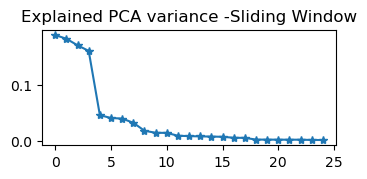

In [31]:
from sklearn.decomposition import PCA
#PCA of the Sliding window point cloud
pca = PCA(n_components=25)
XS_pca = pca.fit(XS).transform(XS)
plt.figure(figsize = (3.8,1.5))
plt.plot(pca.explained_variance_ratio_, '-*') ;
plt.title('Explained PCA variance -Sliding Window');
fig = go.Figure(data=[go.Scatter3d(
    x=XS_pca[:,0], y=XS_pca[:,1], z=XS_pca[:,2], 
    mode ='markers', 
    #marker = dict(size = 3, color = np.arange(data.shape[0]) , colorscale='plasma' , opacity = 1)
    marker = dict(size = 3, color = 'grey', opacity = 1)
)])

fig.update_layout( width=900, height=450) 
fig.show()

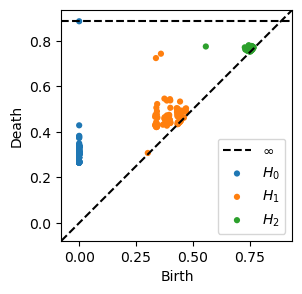

In [32]:
#Compute persistence diagrams of the pca vesion of the sliding window point cloud
res = ripser(XS_pca, maxdim=2, n_perm =150, coeff =13, thresh = 0.9)
dgms = res['dgms']
plt.figure(figsize = (3,3)) 
plot_diagrams(dgms)

In [33]:
# Applying dreimac 

from dreimac import CircularCoords 
from persim import plot_diagrams
from dreimac import CircleMapUtils as CMU

/Users/slmathuser/anaconda3/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?



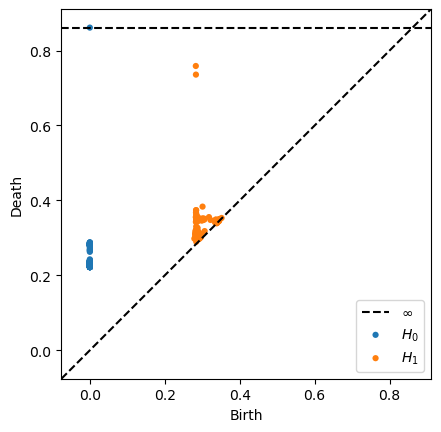

In [35]:
n_lands=500

cc = CircularCoords(XS, n_landmarks=n_lands)

plot_diagrams(cc.dgms_)

In [37]:
#Get the circular coordinates at birth, and for the 2 cocycles with highest persistence
coho_classes = [0, 1]

circular_coords = []

for i in coho_classes:
    theta = cc.get_coordinates(perc= 0, cocycle_idx=i)
    theta = CMU.to_sinebow(np.pi + CMU.center(theta))
    circular_coords.append(theta)

In [39]:
#Plot data with 2 circular coordinates
fig = make_subplots(rows=1, cols=len(coho_classes), 
                    subplot_titles = tuple('Circ Coord '+str(i+1) for i in coho_classes),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes]])

for i, coord in enumerate(circular_coords):
    fig.add_trace(
        go.Scatter3d(x=XS_pca[:,0], y=XS_pca[:,1], z=XS_pca[:,2],   mode ='markers', 
        marker=dict(size = 2 , color =  circular_coords[i])),
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)

fig.update_layout( showlegend=False )
fig.show()

In [75]:
import cv2

# Open the interpolated video file
video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'
cap = cv2.VideoCapture(video_path)

# Determine the desired frame rate
desired_frame_rate = 30  # Example: 24 frames per second

# Calculate the frame indices to keep
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(frame_rate / desired_frame_rate)
frame_indices = range(0, int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), frame_interval)

# Create a VideoWriter to save the selected frames
output_path = 'path/to/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
output_video = cv2.VideoWriter(output_path, fourcc, desired_frame_rate, (output_width, output_height))

# Iterate over the frame indices, extract and save the frames
for frame_index in frame_indices:
    # Set the frame position to extract the desired frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Save the frame to the output video
    output_video.write(frame)

# Release resources
cap.release()
output_video.release()


/Users/slmathuser/anaconda3/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?



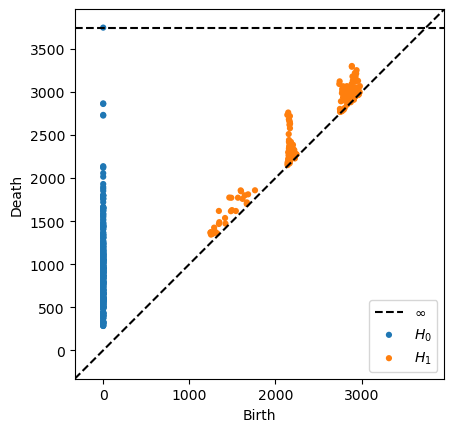

In [76]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

# Assuming you have already computed the persistence diagrams using Ripser
diagrams = ripser(data)['dgms']

# Visualize the persistence diagrams
plot_diagrams(diagrams, show=True)


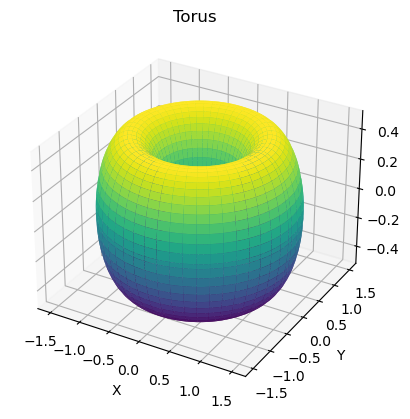

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate torus coordinates
R = 1  # Major radius
r = 0.5  # Minor radius
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the torus surface
ax.plot_surface(x, y, z, cmap='viridis')

# Set plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Torus')

# Show the plot
plt.show()


In [83]:
import cv2

# Open the original video
original_video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv.wmv'
original_cap = cv2.VideoCapture(original_video_path)
original_frame_count = int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Open the processed video
processed_video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'
processed_cap = cv2.VideoCapture(processed_video_path)
processed_frame_count = int(processed_cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Compare the frame counts
if processed_frame_count < original_frame_count:
    print("Frames were removed from the video.")
else:
    print("No frames were removed from the video.")

# Release resources
original_cap.release()
processed_cap.release()


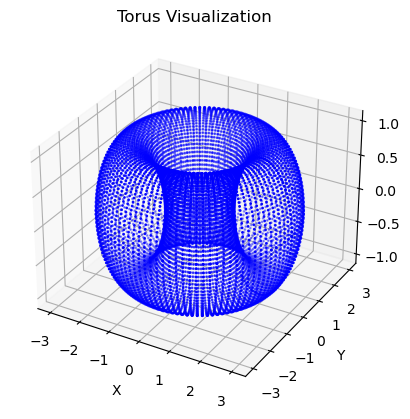

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data for torus coordinates
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1  # Parameters defining the torus shape
x = (c + a * np.cos(theta)) * np.cos(phi)
y = (c + a * np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the torus as points
ax.scatter(x, y, z, s=1, c='b')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Torus Visualization')

# Show the plot
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data for torus coordinates
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1  # Parameters defining the torus shape
x = (c + a * np.cos(theta)) * np.cos(phi)
y = (c + a * np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the torus as a wireframe
ax.plot_wireframe(x, y, z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Torus Visualization')

# Show the plot
plt.show()


In [90]:
import cv2

# Open the interpolated video file
video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'
cap = cv2.VideoCapture(video_path)

# Determine the desired frame rate
desired_frame_rate = 24  # Example: 24 frames per second

# Calculate the frame indices to keep
original_frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(original_frame_rate / desired_frame_rate)
frame_indices = range(0, int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), frame_interval)

# Create a VideoWriter to save the selected frames
output_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
output_video = cv2.VideoWriter(output_path, fourcc, desired_frame_rate, (output_width, output_height))

# Iterate over the frame indices, extract and save the frames
for frame_index in frame_indices:
    # Set the frame position to extract the desired frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Save the frame to the output video
    output_video.write(frame)
    
    # Print progress
    if frame_index % 1000 == 0:
        print(f"Processed {frame_index} frames")

# Release resources
cap.release()
output_video.release()


In [ ]:
import cv2

# Video file path
video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Read and display the frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Display the frame
    cv2.imshow('Video', frame)
    
    # Check if the 'q' key is pressed to exit the video playback
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
import pyglet

# Video file path
video_path = '/Users/slmathuser/Documents/MSRI-UP/dots_quasi.wmv'

# Create a pyglet media player
player = pyglet.media.Player()

# Load the video file
source = pyglet.media.StreamingSource()
media_format = pyglet.media.VideoFormatDecoder().get_supported_file_format(video_path)
video = pyglet.media.load(video_path, file=source, format=media_format)

# Queue the video for playback
player.queue(video)

# Start playing the video
player.play()

# Create a pyglet window to display the video
window = pyglet.window.Window(video.width, video.height)

@window.event
def on_draw():
    window.clear()
    player.get_texture().blit(0, 0)

# Run the pyglet application
pyglet.app.run()
